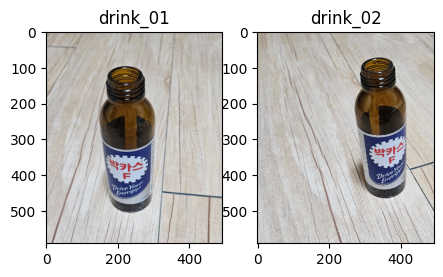

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

img1 = cv2.imread('/workspace/drink_01.png')
img2 = cv2.imread('/workspace/drink_02.png')

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

fig, axes = plt.subplots(1, 2, figsize=(5, 10))
axes[0].imshow(img1)
axes[0].set_title("drink_01")
axes[1].imshow(img2)
axes[1].set_title("drink_02")
plt.show()

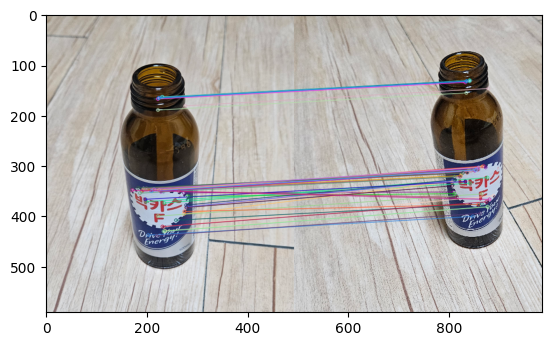

In [2]:
orb = cv2.ORB_create()
kp1, desc1 = orb.detectAndCompute(img1, None)
kp2, desc2 = orb.detectAndCompute(img2, None)

# 특징점 매칭
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(desc1, desc2)
matches = sorted(matches, key=lambda x: x.distance)

matched_img = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=2)
plt.imshow(matched_img)
plt.show()

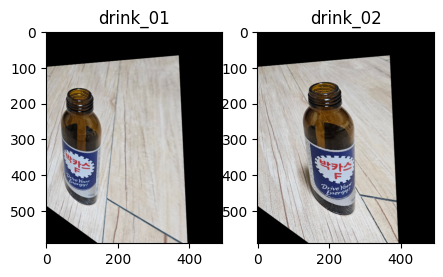

In [3]:
import numpy as np

# 호모그래피 계산
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

h, w, c = img1.shape
img1_warped = cv2.warpPerspective(img1, np.linalg.inv(M), (w, h))
img2_warped = cv2.warpPerspective(img2, np.linalg.inv(M), (w, h))

fig, axes = plt.subplots(1, 2, figsize=(5, 10))
axes[0].imshow(img1_warped)
axes[0].set_title("drink_01")
axes[1].imshow(img2_warped)
axes[1].set_title("drink_02")
plt.show()